In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.4.1
Running on TPU  ['10.92.217.34:8470']


INFO:tensorflow:Initializing the TPU system: grpc://10.92.217.34:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.92.217.34:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
import numpy as np
import os
from PIL import Image
from matplotlib import pyplot as plt
from moviepy.editor import *
import cv2
import moviepy
import sys
import tensorflow.keras.layers as tfKL
from tensorflow.keras import regularizers
from keras.layers import Activation, Dense 
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import random
import pandas as pd
nLookback=4
nSubsequences= 5
height=50
width=50
channels=3
nCategories=8
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
X=np.load("/content/gdrive/MyDrive/hand sign database array X.npy")
Y=np.load("/content/gdrive/MyDrive/hand sign database array Y.npy")
Xmean=np.mean(X)
Xstd=np.std(X)
print(Xmean)
print(Xstd)
X=(X-Xmean)/Xstd
nCategories=8
Xmean=np.mean(X)
Xstd=np.std(X)
print(Xmean)
print(Xstd)
trainSetX=list()
testSetX=list()
trainSetY=list()
testSetY=list()
valSetX=list()
valSetY=list()
for i in range(nCategories):
  wholeset=list()
  for j in range(np.shape(Y)[0]):
    if(Y[j]==i):
      wholeset.append(j)
  # idk=X[wholeset]
  print(np.shape(wholeset))
  traini,testnvali=train_test_split(wholeset,test_size=0.25)
  vali,testi=train_test_split(testnvali,test_size=(0.384))
  for x in traini:
    trainSetX.append(X[x])
    trainSetY.append(Y[x])
  for x in testi:
    testSetX.append(X[x])
    testSetY.append(Y[x])
  for x in vali:
    valSetX.append(X[x])
    valSetY.append(Y[x])
print(np.shape(trainSetX))
print(np.shape(valSetX))
print(np.shape(testSetX))

76.08792970149254
37.221323957827764
-7.58063079786192e-17
0.9999999999999996
(52,)
(52,)
(52,)
(52,)
(52,)
(40,)
(52,)
(50,)
(301, 20, 50, 50, 3)
(62, 20, 50, 50, 3)
(39, 20, 50, 50, 3)


In [ ]:
def createModel(layers,metrics=['accuracy'],loss='categorical_crossentropy',optimizer='adam'):
  with tpu_strategy.scope():
    model=tf.keras.Sequential()
    for layer in layers:
      model.add(layer)
    model.compile(metrics=metrics,loss=loss,optimizer=optimizer)    
    return model

In [ ]:
def evaluateModel(layers,trainX=trainSetX,trainY=trainSetY,valX=valSetX,valY=valSetY,metrics=['accuracy'],loss='categorical_crossentropy',optimizer='adam',nSubsequences=5,nLookback=4,nCategories=8,verbose=2,epochs=500,batch_size=10):
  
  with tpu_strategy.scope(): 
    trainX=np.asarray(trainX)
    trainY=np.asarray(trainY)
    valX=np.asarray(valX)
    valY=np.asarray(valY)
    height=trainX.shape[2]
    width=trainX.shape[3]
    channels=trainX.shape[4]
    trainX=trainX.reshape((trainX.shape[0],nSubsequences,nLookback,trainX.shape[2],trainX.shape[3],trainX.shape[4]))
    trainY=tf.keras.utils.to_categorical(trainY)

    
    valX=valX.reshape((valX.shape[0],nSubsequences,nLookback,valX.shape[2],valX.shape[3],valX.shape[4]))
    valY=tf.keras.utils.to_categorical(valY)
  print(np.shape(trainX))
  print(np.shape(trainY))
  print(np.shape(valX))
  print(np.shape(valY))
  with tpu_strategy.scope():
    model=createModel(layers=layers,metrics=metrics,loss=loss,optimizer=optimizer)
    # print(trainX)
    history=model.fit(x=trainX,y=trainY,batch_size=batch_size,epochs=epochs,verbose=verbose,validation_data =(valX,valY))

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
  return model

In [ ]:
def testAccuracy(Result,testSetY=testSetY):
  diff=np.asarray(Result)-np.asarray(testSetY)
  answer=(((np.shape(diff))[0]-np.count_nonzero(diff)))/(np.shape(diff)[0])
  return answer

(301, 5, 4, 50, 50, 3)
(301, 8)
(70, 5, 4, 50, 50, 3)
(70, 8)
Epoch 1/500
31/31 - 29s - loss: 3.2331 - accuracy: 0.3156 - val_loss: 2.3007 - val_accuracy: 0.4429
Epoch 2/500
31/31 - 4s - loss: 1.8390 - accuracy: 0.4817 - val_loss: 1.6750 - val_accuracy: 0.5000
Epoch 3/500
31/31 - 4s - loss: 1.4837 - accuracy: 0.5847 - val_loss: 1.5293 - val_accuracy: 0.5429
Epoch 4/500
31/31 - 4s - loss: 1.4018 - accuracy: 0.6445 - val_loss: 1.4995 - val_accuracy: 0.5143
Epoch 5/500
31/31 - 4s - loss: 1.2319 - accuracy: 0.6645 - val_loss: 1.2189 - val_accuracy: 0.6857
Epoch 6/500
31/31 - 4s - loss: 1.0741 - accuracy: 0.7508 - val_loss: 1.2094 - val_accuracy: 0.6286
Epoch 7/500
31/31 - 4s - loss: 0.9730 - accuracy: 0.7276 - val_loss: 1.1922 - val_accuracy: 0.6857
Epoch 8/500
31/31 - 4s - loss: 0.8735 - accuracy: 0.7342 - val_loss: 1.1524 - val_accuracy: 0.6571
Epoch 9/500
31/31 - 4s - loss: 0.9299 - accuracy: 0.7575 - val_loss: 1.1797 - val_accuracy: 0.5857
Epoch 10/500
31/31 - 4s - loss: 0.8789 - accur

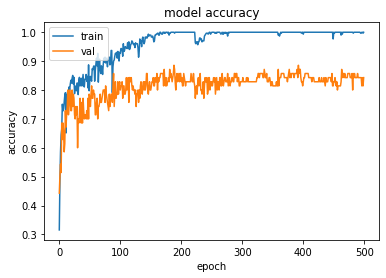

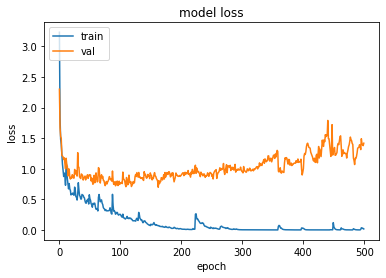

 Our result:- 
 [0 0 0 0 1 4 7 1 2 2 2 2 3 3 3 3 4 4 4 4 5 5 5 6 6 6 6 3 7 7 4]
Real testY:- 
 [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7]
Accuracy:- 
 0.8709677419354839


In [ ]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=66,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.3)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=141,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  Result=evaluateModel(layers).predict(np.reshape(np.asarray(testSetX),newshape=(31,nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

In [ ]:
# so we are gonna look around
# 66   0.3
# 142

'\nso we are gonna look around\n66   0.3\n142\n'

(301, 5, 4, 50, 50, 3)
(301, 8)
(70, 5, 4, 50, 50, 3)
(70, 8)
Epoch 1/650
31/31 - 29s - loss: 3.3294 - accuracy: 0.2791 - val_loss: 2.3101 - val_accuracy: 0.4571
Epoch 2/650
31/31 - 4s - loss: 2.0729 - accuracy: 0.4086 - val_loss: 1.6828 - val_accuracy: 0.5857
Epoch 3/650
31/31 - 4s - loss: 1.6332 - accuracy: 0.5548 - val_loss: 1.4667 - val_accuracy: 0.5429
Epoch 4/650
31/31 - 4s - loss: 1.4182 - accuracy: 0.6179 - val_loss: 1.3077 - val_accuracy: 0.5857
Epoch 5/650
31/31 - 4s - loss: 1.2449 - accuracy: 0.6346 - val_loss: 1.2072 - val_accuracy: 0.6429
Epoch 6/650
31/31 - 4s - loss: 1.0824 - accuracy: 0.7409 - val_loss: 1.0953 - val_accuracy: 0.7286
Epoch 7/650
31/31 - 4s - loss: 1.0288 - accuracy: 0.7176 - val_loss: 1.1303 - val_accuracy: 0.7143
Epoch 8/650
31/31 - 4s - loss: 1.0649 - accuracy: 0.7209 - val_loss: 1.0626 - val_accuracy: 0.7000
Epoch 9/650
31/31 - 4s - loss: 0.9881 - accuracy: 0.7442 - val_loss: 1.0208 - val_accuracy: 0.7143
Epoch 10/650
31/31 - 4s - loss: 0.9007 - accur

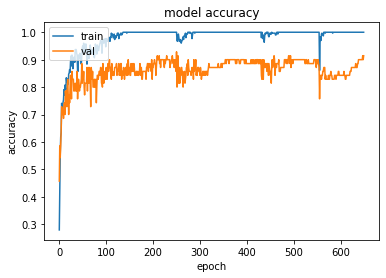

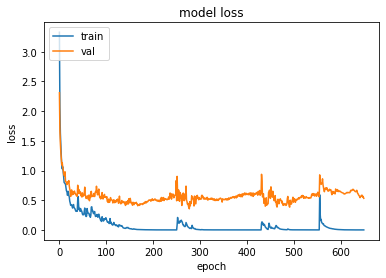

 Our result:- 
 [0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4 5 5 5 6 1 6 6 7 7 7 7]
Real testY:- 
 [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7]
Accuracy:- 
 0.967741935483871


In [ ]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=66,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.3)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=142,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  Result=evaluateModel(layers,epochs=650).predict(np.reshape(np.asarray(testSetX),newshape=(31,nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

(301, 5, 4, 50, 50, 3)
(301, 8)
(62, 5, 4, 50, 50, 3)
(62, 8)
Epoch 1/500
31/31 - 29s - loss: 3.7180 - accuracy: 0.2890 - val_loss: 2.7944 - val_accuracy: 0.3065
Epoch 2/500
31/31 - 4s - loss: 2.1504 - accuracy: 0.4153 - val_loss: 2.0219 - val_accuracy: 0.4032
Epoch 3/500
31/31 - 4s - loss: 1.6134 - accuracy: 0.5980 - val_loss: 1.7597 - val_accuracy: 0.5806
Epoch 4/500
31/31 - 4s - loss: 1.3282 - accuracy: 0.6777 - val_loss: 1.5315 - val_accuracy: 0.6290
Epoch 5/500
31/31 - 4s - loss: 1.0473 - accuracy: 0.7508 - val_loss: 1.5062 - val_accuracy: 0.5968
Epoch 6/500
31/31 - 4s - loss: 0.9900 - accuracy: 0.7342 - val_loss: 1.4475 - val_accuracy: 0.6290
Epoch 7/500
31/31 - 4s - loss: 0.9672 - accuracy: 0.7708 - val_loss: 1.4106 - val_accuracy: 0.6613
Epoch 8/500
31/31 - 4s - loss: 0.9854 - accuracy: 0.7674 - val_loss: 1.4330 - val_accuracy: 0.5968
Epoch 9/500
31/31 - 4s - loss: 0.8965 - accuracy: 0.7375 - val_loss: 1.3275 - val_accuracy: 0.6613
Epoch 10/500
31/31 - 4s - loss: 0.8900 - accur

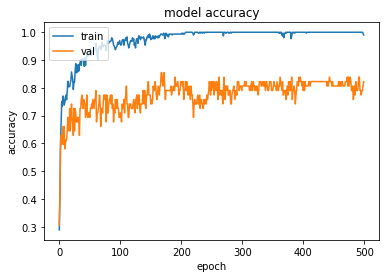

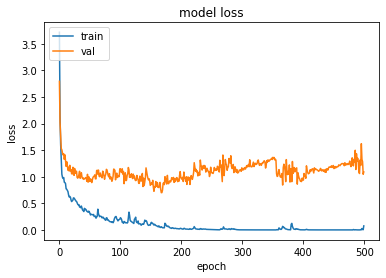

 Our result:- 
 [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 5 4 4 4 4 3 5 5 5 6 1 6 1 1 7 7 7
 7 7]
Real testY:- 
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7]
Accuracy:- 
 0.8717948717948718


In [ ]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=66,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.3)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=140,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  Result=evaluateModel(layers,epochs=500).predict(np.reshape(np.asarray(testSetX),newshape=(np.shape(testSetX)[0],nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

(301, 5, 4, 50, 50, 3)
(301, 8)
(62, 5, 4, 50, 50, 3)
(62, 8)
Epoch 1/500
31/31 - 30s - loss: 3.2993 - accuracy: 0.3854 - val_loss: 2.3215 - val_accuracy: 0.4516
Epoch 2/500
31/31 - 4s - loss: 1.7802 - accuracy: 0.5150 - val_loss: 1.6339 - val_accuracy: 0.4516
Epoch 3/500
31/31 - 4s - loss: 1.2975 - accuracy: 0.5947 - val_loss: 1.4321 - val_accuracy: 0.5645
Epoch 4/500
31/31 - 4s - loss: 1.1220 - accuracy: 0.6711 - val_loss: 1.2401 - val_accuracy: 0.6290
Epoch 5/500
31/31 - 4s - loss: 1.0539 - accuracy: 0.6811 - val_loss: 1.2873 - val_accuracy: 0.6452
Epoch 6/500
31/31 - 4s - loss: 1.0221 - accuracy: 0.7375 - val_loss: 1.2783 - val_accuracy: 0.5806
Epoch 7/500
31/31 - 4s - loss: 0.8932 - accuracy: 0.7575 - val_loss: 1.1261 - val_accuracy: 0.6129
Epoch 8/500
31/31 - 4s - loss: 0.8520 - accuracy: 0.7309 - val_loss: 1.1915 - val_accuracy: 0.6613
Epoch 9/500
31/31 - 4s - loss: 0.7283 - accuracy: 0.7841 - val_loss: 1.1324 - val_accuracy: 0.6290
Epoch 10/500
31/31 - 4s - loss: 0.6479 - accur

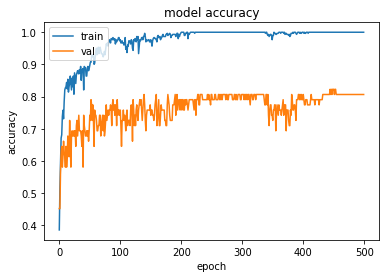

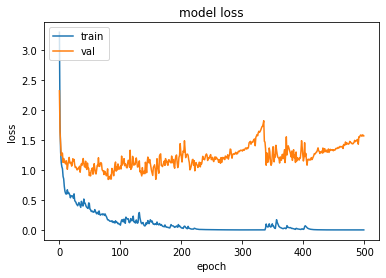

 Our result:- 
 [0 0 0 0 0 1 1 4 1 1 2 2 2 2 3 3 3 3 3 3 5 4 4 4 4 5 5 5 7 6 1 6 1 6 7 7 7
 7 7]
Real testY:- 
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7]
Accuracy:- 
 0.8461538461538461


In [ ]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=66,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.3)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=139,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  Result=evaluateModel(layers,epochs=500).predict(np.reshape(np.asarray(testSetX),newshape=(np.shape(testSetX)[0],nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

(301, 5, 4, 50, 50, 3)
(301, 8)
(62, 5, 4, 50, 50, 3)
(62, 8)
Epoch 1/500
31/31 - 29s - loss: 3.1408 - accuracy: 0.3953 - val_loss: 2.3667 - val_accuracy: 0.4032
Epoch 2/500
31/31 - 4s - loss: 1.7559 - accuracy: 0.5814 - val_loss: 1.6318 - val_accuracy: 0.5645
Epoch 3/500
31/31 - 4s - loss: 1.2369 - accuracy: 0.6545 - val_loss: 1.5105 - val_accuracy: 0.5484
Epoch 4/500
31/31 - 4s - loss: 1.1035 - accuracy: 0.6711 - val_loss: 1.3526 - val_accuracy: 0.5968
Epoch 5/500
31/31 - 4s - loss: 0.9276 - accuracy: 0.7309 - val_loss: 1.4545 - val_accuracy: 0.5645
Epoch 6/500
31/31 - 4s - loss: 1.1179 - accuracy: 0.6877 - val_loss: 1.4293 - val_accuracy: 0.6290
Epoch 7/500
31/31 - 4s - loss: 0.9106 - accuracy: 0.7741 - val_loss: 1.3037 - val_accuracy: 0.6290
Epoch 8/500
31/31 - 4s - loss: 0.9129 - accuracy: 0.7508 - val_loss: 1.3666 - val_accuracy: 0.5645
Epoch 9/500
31/31 - 4s - loss: 0.8428 - accuracy: 0.7641 - val_loss: 1.2530 - val_accuracy: 0.6290
Epoch 10/500
31/31 - 4s - loss: 0.7227 - accur

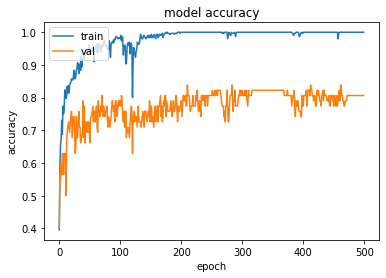

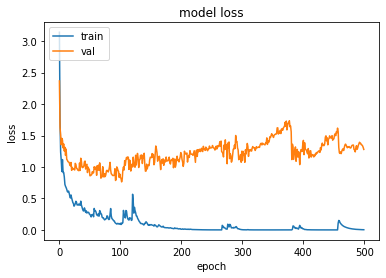

 Our result:- 
 [0 0 0 0 0 1 1 1 1 6 2 2 2 2 2 3 3 3 3 3 5 4 4 4 4 5 5 5 5 6 1 6 1 6 7 7 7
 7 7]
Real testY:- 
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7]
Accuracy:- 
 0.8974358974358975


In [ ]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=66,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.3)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=143,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  Result=evaluateModel(layers,epochs=500).predict(np.reshape(np.asarray(testSetX),newshape=(np.shape(testSetX)[0],nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

(301, 5, 4, 50, 50, 3)
(301, 8)
(62, 5, 4, 50, 50, 3)
(62, 8)
Epoch 1/650
31/31 - 30s - loss: 3.0408 - accuracy: 0.4053 - val_loss: 2.2985 - val_accuracy: 0.3710
Epoch 2/650
31/31 - 4s - loss: 1.7838 - accuracy: 0.5349 - val_loss: 1.7064 - val_accuracy: 0.4677
Epoch 3/650
31/31 - 4s - loss: 1.3251 - accuracy: 0.6246 - val_loss: 1.5218 - val_accuracy: 0.4839
Epoch 4/650
31/31 - 4s - loss: 1.1748 - accuracy: 0.6545 - val_loss: 1.4464 - val_accuracy: 0.5161
Epoch 5/650
31/31 - 4s - loss: 1.1436 - accuracy: 0.7176 - val_loss: 1.3654 - val_accuracy: 0.6290
Epoch 6/650
31/31 - 4s - loss: 1.1336 - accuracy: 0.7508 - val_loss: 1.3166 - val_accuracy: 0.6290
Epoch 7/650
31/31 - 4s - loss: 0.9965 - accuracy: 0.7608 - val_loss: 1.2766 - val_accuracy: 0.6129
Epoch 8/650
31/31 - 4s - loss: 0.8577 - accuracy: 0.7940 - val_loss: 1.1911 - val_accuracy: 0.6452
Epoch 9/650
31/31 - 4s - loss: 0.9066 - accuracy: 0.7641 - val_loss: 1.2170 - val_accuracy: 0.6129
Epoch 10/650
31/31 - 4s - loss: 0.8100 - accur

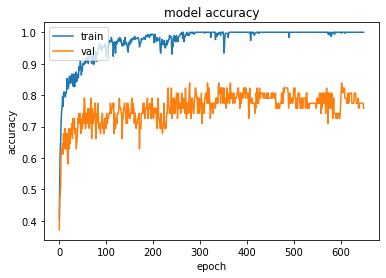

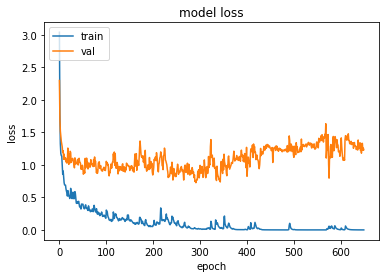

ValueError: ignored

In [ ]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=66,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.3)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=142,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  Result=evaluateModel(layers,epochs=500).predict(np.reshape(np.asarray(testSetX),newshape=(np.shape(testSetX)[0],nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

(301, 5, 4, 50, 50, 3)
(301, 8)
(62, 5, 4, 50, 50, 3)
(62, 8)
Epoch 1/500
31/31 - 19s - loss: 3.2897 - accuracy: 0.3920 - val_loss: 2.3363 - val_accuracy: 0.4677
Epoch 2/500
31/31 - 4s - loss: 1.7232 - accuracy: 0.5814 - val_loss: 1.6066 - val_accuracy: 0.4839
Epoch 3/500
31/31 - 4s - loss: 1.1852 - accuracy: 0.6777 - val_loss: 1.3726 - val_accuracy: 0.5323
Epoch 4/500
31/31 - 4s - loss: 1.0285 - accuracy: 0.7409 - val_loss: 1.3227 - val_accuracy: 0.6129
Epoch 5/500
31/31 - 4s - loss: 0.9688 - accuracy: 0.7708 - val_loss: 1.2159 - val_accuracy: 0.5645
Epoch 6/500
31/31 - 4s - loss: 0.8742 - accuracy: 0.7807 - val_loss: 1.2467 - val_accuracy: 0.5645
Epoch 7/500
31/31 - 4s - loss: 0.7611 - accuracy: 0.7874 - val_loss: 1.1914 - val_accuracy: 0.6290
Epoch 8/500
31/31 - 4s - loss: 0.7198 - accuracy: 0.8173 - val_loss: 1.0704 - val_accuracy: 0.5968
Epoch 9/500
31/31 - 4s - loss: 0.6572 - accuracy: 0.8206 - val_loss: 1.1900 - val_accuracy: 0.6129
Epoch 10/500
31/31 - 4s - loss: 0.6648 - accur

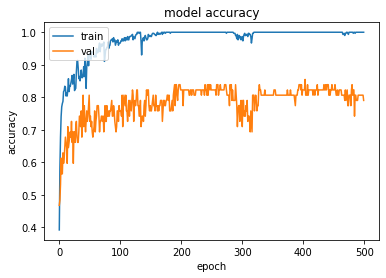

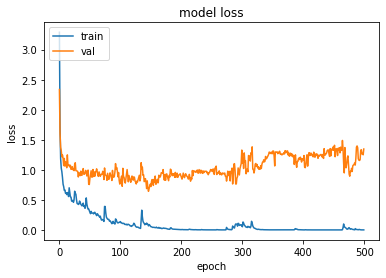

 Our result:- 
 [0 0 0 0 0 1 1 4 6 1 2 2 2 2 2 3 3 3 3 3 5 4 4 4 4 3 5 5 5 6 1 6 1 6 7 7 7
 7 7]
Real testY:- 
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7]
Accuracy:- 
 0.8461538461538461


In [ ]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=64,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.3)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=142,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  Result=evaluateModel(layers,epochs=500).predict(np.reshape(np.asarray(testSetX),newshape=(np.shape(testSetX)[0],nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

(301, 5, 4, 50, 50, 3)
(301, 8)
(62, 5, 4, 50, 50, 3)
(62, 8)
Epoch 1/500
31/31 - 31s - loss: 3.0312 - accuracy: 0.3920 - val_loss: 2.3182 - val_accuracy: 0.4194
Epoch 2/500
31/31 - 4s - loss: 1.7269 - accuracy: 0.5880 - val_loss: 1.6722 - val_accuracy: 0.5323
Epoch 3/500
31/31 - 4s - loss: 1.3417 - accuracy: 0.6611 - val_loss: 1.5387 - val_accuracy: 0.5323
Epoch 4/500
31/31 - 4s - loss: 1.1980 - accuracy: 0.6711 - val_loss: 1.5446 - val_accuracy: 0.5000
Epoch 5/500
31/31 - 4s - loss: 1.1043 - accuracy: 0.7409 - val_loss: 1.3742 - val_accuracy: 0.6129
Epoch 6/500
31/31 - 4s - loss: 1.0679 - accuracy: 0.7276 - val_loss: 1.3370 - val_accuracy: 0.5968
Epoch 7/500
31/31 - 4s - loss: 0.9637 - accuracy: 0.7674 - val_loss: 1.2376 - val_accuracy: 0.6935
Epoch 8/500
31/31 - 4s - loss: 0.8381 - accuracy: 0.7907 - val_loss: 1.2112 - val_accuracy: 0.7097
Epoch 9/500
31/31 - 4s - loss: 0.8731 - accuracy: 0.7641 - val_loss: 1.2204 - val_accuracy: 0.6613
Epoch 10/500
31/31 - 4s - loss: 0.8086 - accur

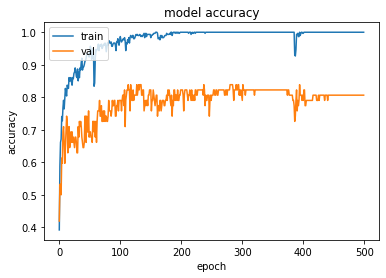

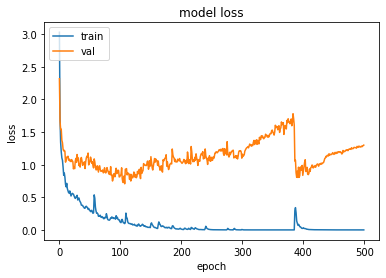

 Our result:- 
 [0 0 0 0 0 1 1 4 1 1 2 2 2 2 2 3 3 3 3 3 5 4 4 4 4 5 5 5 5 6 1 6 1 6 7 7 7
 7 7]
Real testY:- 
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7]
Accuracy:- 
 0.8974358974358975


In [ ]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=67,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.3)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=142,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  Result=evaluateModel(layers,epochs=500).predict(np.reshape(np.asarray(testSetX),newshape=(np.shape(testSetX)[0],nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

(301, 5, 4, 50, 50, 3)
(301, 8)
(62, 5, 4, 50, 50, 3)
(62, 8)
Epoch 1/500
31/31 - 31s - loss: 2.9759 - accuracy: 0.3522 - val_loss: 2.1634 - val_accuracy: 0.4032
Epoch 2/500
31/31 - 4s - loss: 1.6659 - accuracy: 0.5914 - val_loss: 1.6329 - val_accuracy: 0.4839
Epoch 3/500
31/31 - 4s - loss: 1.3189 - accuracy: 0.6346 - val_loss: 1.4871 - val_accuracy: 0.5000
Epoch 4/500
31/31 - 4s - loss: 1.1601 - accuracy: 0.6844 - val_loss: 1.4124 - val_accuracy: 0.5323
Epoch 5/500
31/31 - 4s - loss: 0.9874 - accuracy: 0.7209 - val_loss: 1.2603 - val_accuracy: 0.6290
Epoch 6/500
31/31 - 4s - loss: 0.8801 - accuracy: 0.7940 - val_loss: 1.2285 - val_accuracy: 0.5806
Epoch 7/500
31/31 - 4s - loss: 0.8724 - accuracy: 0.7807 - val_loss: 1.2080 - val_accuracy: 0.6129
Epoch 8/500
31/31 - 4s - loss: 0.7922 - accuracy: 0.8073 - val_loss: 1.2008 - val_accuracy: 0.5968
Epoch 9/500
31/31 - 4s - loss: 0.7670 - accuracy: 0.8239 - val_loss: 1.1790 - val_accuracy: 0.5806
Epoch 10/500
31/31 - 4s - loss: 0.8990 - accur

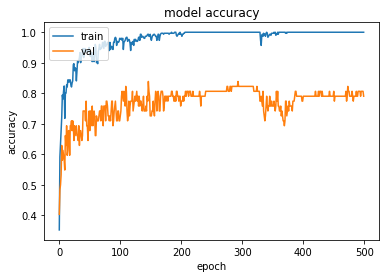

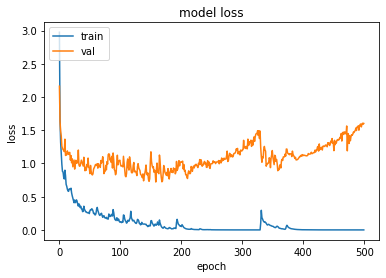

 Our result:- 
 [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 5 4 4 4 4 5 5 5 5 6 1 6 1 6 7 7 7
 7 7]
Real testY:- 
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7]
Accuracy:- 
 0.9230769230769231


In [ ]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=65,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.3)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=141,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  Result=evaluateModel(layers,epochs=500).predict(np.reshape(np.asarray(testSetX),newshape=(np.shape(testSetX)[0],nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

(301, 5, 4, 50, 50, 3)
(301, 8)
(62, 5, 4, 50, 50, 3)
(62, 8)
Epoch 1/500
31/31 - 31s - loss: 3.0937 - accuracy: 0.3920 - val_loss: 2.3743 - val_accuracy: 0.4032
Epoch 2/500
31/31 - 4s - loss: 1.6449 - accuracy: 0.5914 - val_loss: 1.6246 - val_accuracy: 0.5484
Epoch 3/500
31/31 - 4s - loss: 1.1629 - accuracy: 0.7243 - val_loss: 1.3316 - val_accuracy: 0.6452
Epoch 4/500
31/31 - 4s - loss: 0.9253 - accuracy: 0.7475 - val_loss: 1.2839 - val_accuracy: 0.6452
Epoch 5/500
31/31 - 4s - loss: 0.8919 - accuracy: 0.7475 - val_loss: 1.2904 - val_accuracy: 0.6290
Epoch 6/500
31/31 - 4s - loss: 0.8143 - accuracy: 0.7741 - val_loss: 1.2453 - val_accuracy: 0.5968
Epoch 7/500
31/31 - 4s - loss: 0.7620 - accuracy: 0.7674 - val_loss: 1.1150 - val_accuracy: 0.6774
Epoch 8/500
31/31 - 4s - loss: 0.7975 - accuracy: 0.7907 - val_loss: 1.2098 - val_accuracy: 0.5806
Epoch 9/500
31/31 - 4s - loss: 0.7289 - accuracy: 0.8073 - val_loss: 1.1961 - val_accuracy: 0.6129
Epoch 10/500
31/31 - 4s - loss: 0.6976 - accur

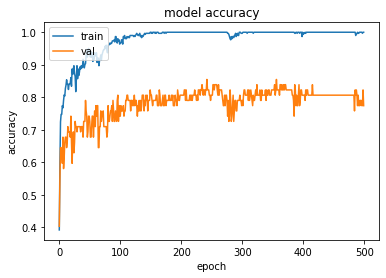

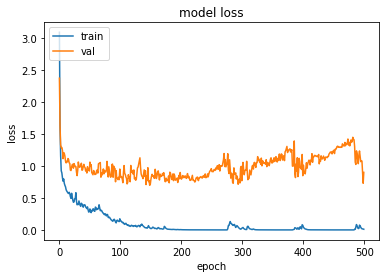

 Our result:- 
 [0 0 0 0 0 1 1 4 6 6 0 2 2 2 2 3 3 3 3 3 5 4 4 4 4 3 7 5 7 6 1 6 1 6 7 7 7
 7 7]
Real testY:- 
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7]
Accuracy:- 
 0.7435897435897436


In [ ]:
 layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=65,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.3)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=143,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  Result=evaluateModel(layers,epochs=500).predict(np.reshape(np.asarray(testSetX),newshape=(np.shape(testSetX)[0],nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

(301, 5, 4, 50, 50, 3)
(301, 8)
(62, 5, 4, 50, 50, 3)
(62, 8)
Epoch 1/500
31/31 - 31s - loss: 4.5381 - accuracy: 0.1163 - val_loss: 2.9362 - val_accuracy: 0.1290
Epoch 2/500
31/31 - 4s - loss: 2.3677 - accuracy: 0.1362 - val_loss: 2.0827 - val_accuracy: 0.1774
Epoch 3/500
31/31 - 4s - loss: 1.7592 - accuracy: 0.3156 - val_loss: 1.7059 - val_accuracy: 0.3710
Epoch 4/500
31/31 - 4s - loss: 1.4804 - accuracy: 0.5581 - val_loss: 1.5977 - val_accuracy: 0.5161
Epoch 5/500
31/31 - 4s - loss: 1.3360 - accuracy: 0.6844 - val_loss: 1.4519 - val_accuracy: 0.5806
Epoch 6/500
31/31 - 4s - loss: 1.2230 - accuracy: 0.7143 - val_loss: 1.4426 - val_accuracy: 0.5645
Epoch 7/500
31/31 - 4s - loss: 1.1307 - accuracy: 0.7342 - val_loss: 1.3766 - val_accuracy: 0.5806
Epoch 8/500
31/31 - 4s - loss: 1.0664 - accuracy: 0.7243 - val_loss: 1.3783 - val_accuracy: 0.5968
Epoch 9/500
31/31 - 4s - loss: 0.9854 - accuracy: 0.7674 - val_loss: 1.3041 - val_accuracy: 0.6129
Epoch 10/500
31/31 - 4s - loss: 0.8934 - accur

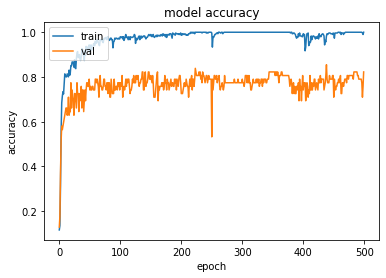

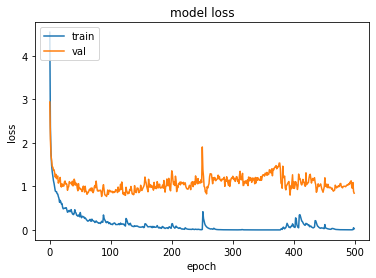

 Our result:- 
 [0 0 0 0 0 1 1 4 1 6 2 2 2 2 3 3 3 3 3 3 5 4 4 4 4 5 5 5 5 6 1 6 1 6 7 7 7
 7 7]
Real testY:- 
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7]
Accuracy:- 
 0.8461538461538461


In [ ]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=65,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.3)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=142,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  Result=evaluateModel(layers,epochs=500).predict(np.reshape(np.asarray(testSetX),newshape=(np.shape(testSetX)[0],nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

(301, 5, 4, 50, 50, 3)
(301, 8)
(62, 5, 4, 50, 50, 3)
(62, 8)
Epoch 1/500
31/31 - 31s - loss: 3.5558 - accuracy: 0.2259 - val_loss: 2.4383 - val_accuracy: 0.4194
Epoch 2/500
31/31 - 4s - loss: 1.9246 - accuracy: 0.4983 - val_loss: 1.6349 - val_accuracy: 0.5000
Epoch 3/500
31/31 - 4s - loss: 1.4036 - accuracy: 0.5914 - val_loss: 1.4447 - val_accuracy: 0.5645
Epoch 4/500
31/31 - 4s - loss: 1.2918 - accuracy: 0.6346 - val_loss: 1.3561 - val_accuracy: 0.5645
Epoch 5/500
31/31 - 4s - loss: 1.1972 - accuracy: 0.6678 - val_loss: 1.2114 - val_accuracy: 0.6290
Epoch 6/500
31/31 - 4s - loss: 1.0828 - accuracy: 0.6910 - val_loss: 1.2710 - val_accuracy: 0.5806
Epoch 7/500
31/31 - 4s - loss: 1.0203 - accuracy: 0.7043 - val_loss: 1.2036 - val_accuracy: 0.6774
Epoch 8/500
31/31 - 4s - loss: 1.1102 - accuracy: 0.6811 - val_loss: 1.1662 - val_accuracy: 0.6774
Epoch 9/500
31/31 - 4s - loss: 0.9886 - accuracy: 0.7608 - val_loss: 1.1638 - val_accuracy: 0.7419
Epoch 10/500
31/31 - 4s - loss: 0.9745 - accur

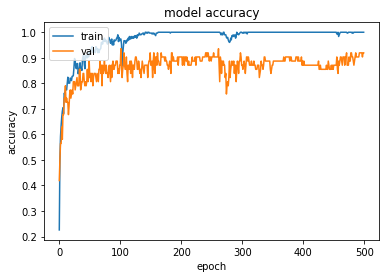

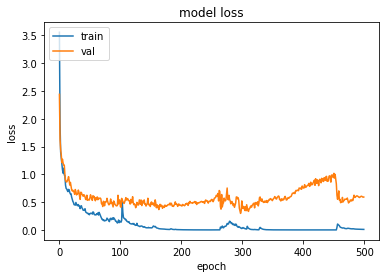

 Our result:- 
 [0 0 0 0 0 1 4 1 1 1 6 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 4 1 1 6 6 7 7 7
 7 7]
Real testY:- 
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7]
Accuracy:- 
 0.8717948717948718


In [ ]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=65,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.25)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=142,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  Result=evaluateModel(layers,epochs=500).predict(np.reshape(np.asarray(testSetX),newshape=(np.shape(testSetX)[0],nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

(301, 5, 4, 50, 50, 3)
(301, 8)
(62, 5, 4, 50, 50, 3)
(62, 8)
Epoch 1/500
31/31 - 31s - loss: 3.2259 - accuracy: 0.2492 - val_loss: 2.3628 - val_accuracy: 0.3226
Epoch 2/500
31/31 - 4s - loss: 2.1215 - accuracy: 0.3621 - val_loss: 1.8932 - val_accuracy: 0.3226
Epoch 3/500
31/31 - 4s - loss: 1.7720 - accuracy: 0.4518 - val_loss: 1.7857 - val_accuracy: 0.3710
Epoch 4/500
31/31 - 4s - loss: 1.5753 - accuracy: 0.5814 - val_loss: 1.4359 - val_accuracy: 0.6452
Epoch 5/500
31/31 - 4s - loss: 1.4309 - accuracy: 0.6412 - val_loss: 1.4736 - val_accuracy: 0.5161
Epoch 6/500
31/31 - 4s - loss: 1.2942 - accuracy: 0.6944 - val_loss: 1.2832 - val_accuracy: 0.6290
Epoch 7/500
31/31 - 4s - loss: 1.1721 - accuracy: 0.6777 - val_loss: 1.1522 - val_accuracy: 0.6774
Epoch 8/500
31/31 - 4s - loss: 1.0934 - accuracy: 0.7375 - val_loss: 1.1400 - val_accuracy: 0.6452
Epoch 9/500
31/31 - 4s - loss: 1.1132 - accuracy: 0.6944 - val_loss: 1.1889 - val_accuracy: 0.6290
Epoch 10/500
31/31 - 4s - loss: 1.0365 - accur

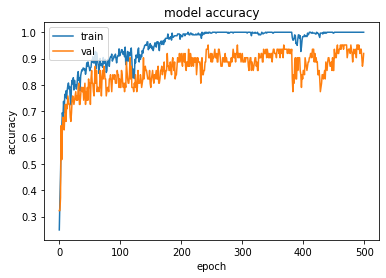

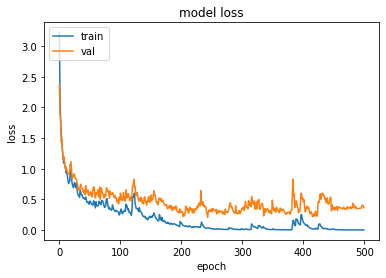

 Our result:- 
 [0 0 0 0 0 6 1 6 1 1 2 2 2 2 2 3 3 3 0 3 4 4 4 4 4 5 5 5 5 6 6 1 6 6 7 7 7
 7 7]
Real testY:- 
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7]
Accuracy:- 
 0.8974358974358975


In [ ]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=65,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.22)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=142,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  Result=evaluateModel(layers,epochs=500).predict(np.reshape(np.asarray(testSetX),newshape=(np.shape(testSetX)[0],nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

This is an amazing curve

(301, 5, 4, 50, 50, 3)
(301, 8)
(62, 5, 4, 50, 50, 3)
(62, 8)
Epoch 1/500
31/31 - 31s - loss: 3.1630 - accuracy: 0.3953 - val_loss: 2.2068 - val_accuracy: 0.5645
Epoch 2/500
31/31 - 4s - loss: 1.8282 - accuracy: 0.5449 - val_loss: 1.6909 - val_accuracy: 0.4355
Epoch 3/500
31/31 - 4s - loss: 1.3848 - accuracy: 0.5714 - val_loss: 1.3324 - val_accuracy: 0.6290
Epoch 4/500
31/31 - 4s - loss: 1.2818 - accuracy: 0.6944 - val_loss: 1.2671 - val_accuracy: 0.5968
Epoch 5/500
31/31 - 4s - loss: 1.1429 - accuracy: 0.6811 - val_loss: 1.1945 - val_accuracy: 0.6129
Epoch 6/500
31/31 - 4s - loss: 1.1311 - accuracy: 0.6844 - val_loss: 1.2393 - val_accuracy: 0.5484
Epoch 7/500
31/31 - 4s - loss: 1.0952 - accuracy: 0.7309 - val_loss: 1.1832 - val_accuracy: 0.6290
Epoch 8/500
31/31 - 4s - loss: 1.0049 - accuracy: 0.7409 - val_loss: 1.1515 - val_accuracy: 0.6774
Epoch 9/500
31/31 - 4s - loss: 1.0195 - accuracy: 0.7342 - val_loss: 1.0239 - val_accuracy: 0.7258
Epoch 10/500
31/31 - 4s - loss: 0.8768 - accur

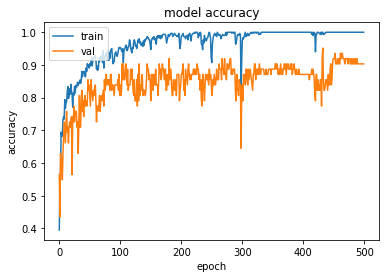

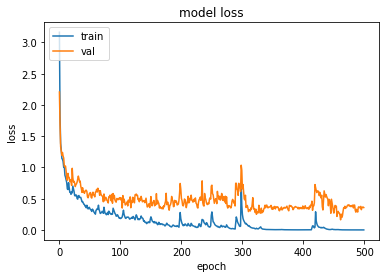

 Our result:- 
 [0 0 0 0 0 6 1 6 1 1 2 2 2 2 2 3 3 3 7 3 4 4 4 4 4 5 5 5 5 6 6 1 6 6 7 7 7
 7 7]
Real testY:- 
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7]
Accuracy:- 
 0.8974358974358975


In [ ]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=65,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.21)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=142,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  Result=evaluateModel(layers,epochs=500).predict(np.reshape(np.asarray(testSetX),newshape=(np.shape(testSetX)[0],nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

(301, 5, 4, 50, 50, 3)
(301, 8)
(62, 5, 4, 50, 50, 3)
(62, 8)
Epoch 1/650
31/31 - 31s - loss: 3.0574 - accuracy: 0.3522 - val_loss: 2.1256 - val_accuracy: 0.4516
Epoch 2/650
31/31 - 4s - loss: 1.6894 - accuracy: 0.5648 - val_loss: 1.5445 - val_accuracy: 0.5806
Epoch 3/650
31/31 - 4s - loss: 1.2872 - accuracy: 0.6711 - val_loss: 1.2918 - val_accuracy: 0.5968
Epoch 4/650
31/31 - 4s - loss: 1.0243 - accuracy: 0.7276 - val_loss: 1.0926 - val_accuracy: 0.6613
Epoch 5/650
31/31 - 4s - loss: 0.9417 - accuracy: 0.7674 - val_loss: 1.0478 - val_accuracy: 0.7419
Epoch 6/650
31/31 - 4s - loss: 0.8636 - accuracy: 0.7608 - val_loss: 0.9239 - val_accuracy: 0.7258
Epoch 7/650
31/31 - 4s - loss: 0.7764 - accuracy: 0.7907 - val_loss: 0.8821 - val_accuracy: 0.7581
Epoch 8/650
31/31 - 4s - loss: 0.8312 - accuracy: 0.7741 - val_loss: 0.8937 - val_accuracy: 0.6774
Epoch 9/650
31/31 - 4s - loss: 0.7646 - accuracy: 0.7608 - val_loss: 0.8999 - val_accuracy: 0.7097
Epoch 10/650
31/31 - 4s - loss: 0.7574 - accur

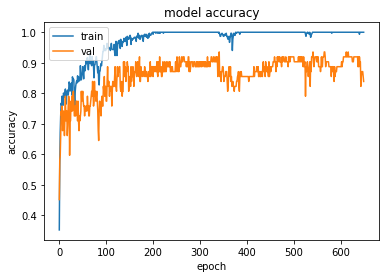

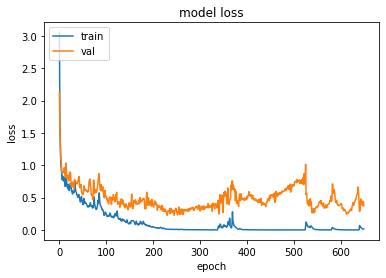

 Our result:- 
 [0 0 0 0 0 1 1 6 1 1 2 2 2 2 2 3 3 3 6 3 4 4 4 4 4 5 5 5 5 6 6 1 6 6 7 7 7
 7 7]
Real testY:- 
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7]
Accuracy:- 
 0.9230769230769231


In [ ]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=65,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.21)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=142,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  Result=evaluateModel(layers,epochs=650).predict(np.reshape(np.asarray(testSetX),newshape=(np.shape(testSetX)[0],nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

(301, 5, 4, 50, 50, 3)
(301, 8)
(62, 5, 4, 50, 50, 3)
(62, 8)
Epoch 1/650
31/31 - 30s - loss: 3.3907 - accuracy: 0.1462 - val_loss: 2.2913 - val_accuracy: 0.2258
Epoch 2/650
31/31 - 4s - loss: 1.9832 - accuracy: 0.3987 - val_loss: 1.7113 - val_accuracy: 0.4355
Epoch 3/650
31/31 - 4s - loss: 1.6290 - accuracy: 0.5482 - val_loss: 1.5163 - val_accuracy: 0.5968
Epoch 4/650
31/31 - 4s - loss: 1.4194 - accuracy: 0.5748 - val_loss: 1.3428 - val_accuracy: 0.5645
Epoch 5/650
31/31 - 4s - loss: 1.4025 - accuracy: 0.6080 - val_loss: 1.3534 - val_accuracy: 0.5968
Epoch 6/650
31/31 - 4s - loss: 1.2687 - accuracy: 0.7209 - val_loss: 1.2071 - val_accuracy: 0.7097
Epoch 7/650
31/31 - 4s - loss: 1.2096 - accuracy: 0.6877 - val_loss: 1.1483 - val_accuracy: 0.6774
Epoch 8/650
31/31 - 4s - loss: 1.2390 - accuracy: 0.6512 - val_loss: 1.3522 - val_accuracy: 0.5484
Epoch 9/650
31/31 - 4s - loss: 1.1647 - accuracy: 0.6711 - val_loss: 1.1250 - val_accuracy: 0.6452
Epoch 10/650
31/31 - 4s - loss: 1.0676 - accur

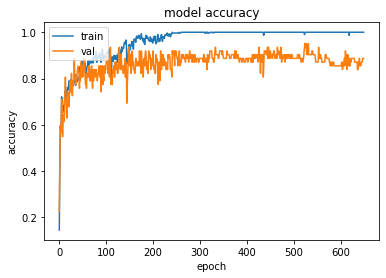

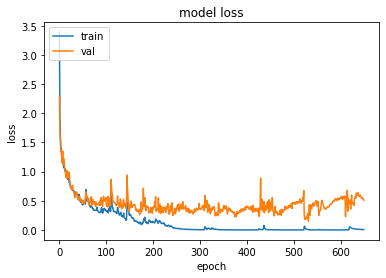

 Our result:- 
 [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 7 3 3 3 3 4 4 1 4 4 5 5 5 5 6 1 1 6 6 7 7 7
 7 7]
Real testY:- 
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7]
Accuracy:- 
 0.8974358974358975


In [ ]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=65,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.20)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=142,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  Result=evaluateModel(layers,epochs=650).predict(np.reshape(np.asarray(testSetX),newshape=(np.shape(testSetX)[0],nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

(301, 5, 4, 50, 50, 3)
(301, 8)
(62, 5, 4, 50, 50, 3)
(62, 8)
Epoch 1/650
31/31 - 31s - loss: 2.9797 - accuracy: 0.3953 - val_loss: 2.1352 - val_accuracy: 0.5323
Epoch 2/650
31/31 - 4s - loss: 1.7427 - accuracy: 0.5581 - val_loss: 1.4913 - val_accuracy: 0.5645
Epoch 3/650
31/31 - 4s - loss: 1.3654 - accuracy: 0.6412 - val_loss: 1.3109 - val_accuracy: 0.6290
Epoch 4/650
31/31 - 4s - loss: 1.1372 - accuracy: 0.7243 - val_loss: 1.1446 - val_accuracy: 0.6613
Epoch 5/650
31/31 - 4s - loss: 1.1110 - accuracy: 0.6877 - val_loss: 1.1570 - val_accuracy: 0.7097
Epoch 6/650
31/31 - 4s - loss: 1.0564 - accuracy: 0.7342 - val_loss: 0.9655 - val_accuracy: 0.7097
Epoch 7/650
31/31 - 4s - loss: 0.9173 - accuracy: 0.7641 - val_loss: 0.8719 - val_accuracy: 0.7581
Epoch 8/650
31/31 - 4s - loss: 0.9004 - accuracy: 0.7708 - val_loss: 0.9013 - val_accuracy: 0.7258
Epoch 9/650
31/31 - 4s - loss: 0.8794 - accuracy: 0.7708 - val_loss: 0.8182 - val_accuracy: 0.8065
Epoch 10/650
31/31 - 4s - loss: 0.7868 - accur

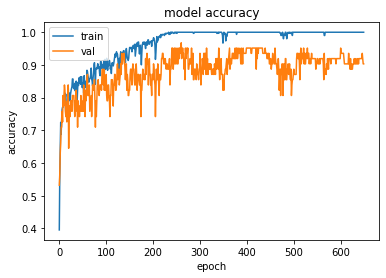

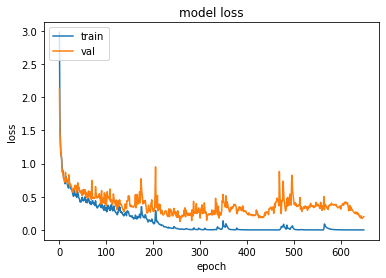

 Our result:- 
 [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 6 1 6 6 6 7 7 7
 7 7]
Real testY:- 
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7]
Accuracy:- 
 0.9743589743589743


In [ ]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=65,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.19)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=142,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  model=evaluateModel(layers,epochs=650)
  Result=model.predict(np.reshape(np.asarray(testSetX),newshape=(np.shape(testSetX)[0],nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

GOOD MODEL

In [ ]:
#SAVE THIS IN GITHUB AS 19_1

In [ ]:
# tf.keras.models.save_model(model,filepath="/content/gdrive/MyDrive/lstm19_65_19_142_noreg_8")
model.save("/content/gdrive/MyDrive/lstm19_65_19_142_noreg_8.h5")


In [ ]:
print(testAccuracy(Res2,testSetY))

0.9743589743589743


(301, 5, 4, 50, 50, 3)
(301, 8)
(62, 5, 4, 50, 50, 3)
(62, 8)
Epoch 1/650
31/31 - 30s - loss: 3.1023 - accuracy: 0.2957 - val_loss: 2.4189 - val_accuracy: 0.3065
Epoch 2/650
31/31 - 4s - loss: 2.0845 - accuracy: 0.3854 - val_loss: 1.8797 - val_accuracy: 0.4032
Epoch 3/650
31/31 - 4s - loss: 1.6532 - accuracy: 0.4917 - val_loss: 1.6735 - val_accuracy: 0.4032
Epoch 4/650
31/31 - 4s - loss: 1.4766 - accuracy: 0.5282 - val_loss: 1.5057 - val_accuracy: 0.5645
Epoch 5/650
31/31 - 4s - loss: 1.3270 - accuracy: 0.6013 - val_loss: 1.3671 - val_accuracy: 0.6290
Epoch 6/650
31/31 - 4s - loss: 1.1552 - accuracy: 0.6811 - val_loss: 1.2624 - val_accuracy: 0.6129
Epoch 7/650
31/31 - 4s - loss: 1.1031 - accuracy: 0.6977 - val_loss: 1.3204 - val_accuracy: 0.6774
Epoch 8/650
31/31 - 4s - loss: 1.0660 - accuracy: 0.7409 - val_loss: 1.2368 - val_accuracy: 0.6452
Epoch 9/650
31/31 - 4s - loss: 0.9707 - accuracy: 0.7508 - val_loss: 1.1259 - val_accuracy: 0.6452
Epoch 10/650
31/31 - 4s - loss: 0.9159 - accur

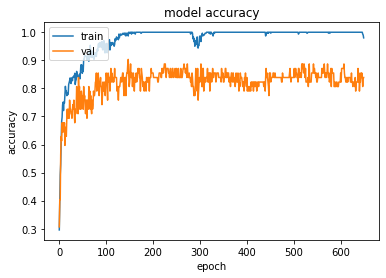

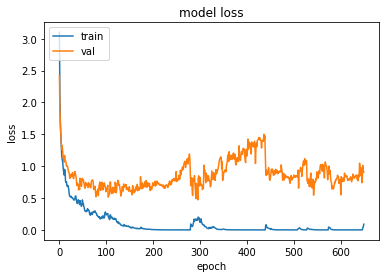

 Our result:- 
 [0 0 0 0 0 7 6 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 6 4 5 5 5 5 6 6 1 1 1 7 7 7
 7 7]
Real testY:- 
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7]
Accuracy:- 
 0.8461538461538461


In [ ]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=65,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.18)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=142,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  model=evaluateModel(layers,epochs=650)
  Result=model.predict(np.reshape(np.asarray(testSetX),newshape=(np.shape(testSetX)[0],nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

(301, 5, 4, 50, 50, 3)
(301, 8)
(62, 5, 4, 50, 50, 3)
(62, 8)
Epoch 1/350
31/31 - 19s - loss: 3.3325 - accuracy: 0.1362 - val_loss: 2.5229 - val_accuracy: 0.1290
Epoch 2/350
31/31 - 4s - loss: 2.2938 - accuracy: 0.2392 - val_loss: 2.0686 - val_accuracy: 0.4839
Epoch 3/350
31/31 - 4s - loss: 1.9907 - accuracy: 0.4651 - val_loss: 1.8930 - val_accuracy: 0.5323
Epoch 4/350
31/31 - 4s - loss: 1.8483 - accuracy: 0.4950 - val_loss: 1.6422 - val_accuracy: 0.6452
Epoch 5/350
31/31 - 4s - loss: 1.6830 - accuracy: 0.5548 - val_loss: 1.7420 - val_accuracy: 0.5484
Epoch 6/350
31/31 - 4s - loss: 1.7363 - accuracy: 0.5183 - val_loss: 1.5846 - val_accuracy: 0.6452
Epoch 7/350
31/31 - 4s - loss: 1.5550 - accuracy: 0.6013 - val_loss: 1.5643 - val_accuracy: 0.5806
Epoch 8/350
31/31 - 4s - loss: 1.4545 - accuracy: 0.6146 - val_loss: 1.3639 - val_accuracy: 0.5968
Epoch 9/350
31/31 - 4s - loss: 1.3640 - accuracy: 0.6346 - val_loss: 1.3161 - val_accuracy: 0.7258
Epoch 10/350
31/31 - 4s - loss: 1.2679 - accur

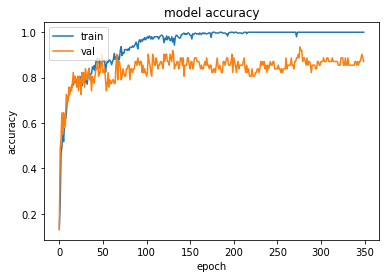

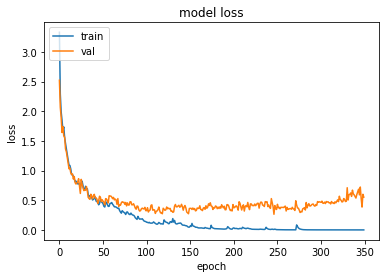

 Our result:- 
 [0 0 0 0 0 6 1 1 1 1 2 3 2 2 2 3 3 3 3 3 5 4 4 4 4 5 4 5 4 6 6 1 6 6 7 7 7
 7 7]
Real testY:- 
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7]
Accuracy:- 
 0.8461538461538461


In [ ]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=65,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.17)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=142,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  model=evaluateModel(layers,epochs=350)
  Result=model.predict(np.reshape(np.asarray(testSetX),newshape=(np.shape(testSetX)[0],nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

(301, 5, 4, 50, 50, 3)
(301, 8)
(62, 5, 4, 50, 50, 3)
(62, 8)
Epoch 1/650
31/31 - 31s - loss: 3.0762 - accuracy: 0.2691 - val_loss: 2.3107 - val_accuracy: 0.4032
Epoch 2/650
31/31 - 4s - loss: 1.9781 - accuracy: 0.4485 - val_loss: 1.8088 - val_accuracy: 0.4194
Epoch 3/650
31/31 - 4s - loss: 1.6620 - accuracy: 0.4485 - val_loss: 1.5449 - val_accuracy: 0.5645
Epoch 4/650
31/31 - 4s - loss: 1.3181 - accuracy: 0.6678 - val_loss: 1.2808 - val_accuracy: 0.6613
Epoch 5/650
31/31 - 4s - loss: 1.2496 - accuracy: 0.6877 - val_loss: 1.2060 - val_accuracy: 0.6613
Epoch 6/650
31/31 - 4s - loss: 1.1300 - accuracy: 0.7010 - val_loss: 1.1346 - val_accuracy: 0.7419
Epoch 7/650
31/31 - 4s - loss: 0.9883 - accuracy: 0.7542 - val_loss: 1.0204 - val_accuracy: 0.7258
Epoch 8/650
31/31 - 4s - loss: 0.9354 - accuracy: 0.7342 - val_loss: 0.9773 - val_accuracy: 0.7097
Epoch 9/650
31/31 - 5s - loss: 0.8995 - accuracy: 0.7774 - val_loss: 0.9614 - val_accuracy: 0.6613
Epoch 10/650
31/31 - 4s - loss: 0.8659 - accur

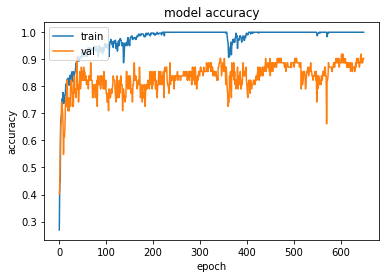

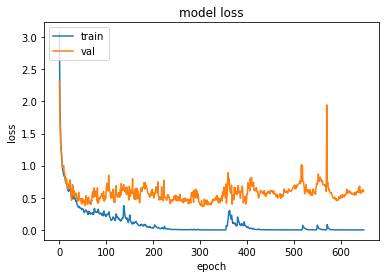

 Our result:- 
 [0 0 0 0 0 1 1 4 1 7 2 2 3 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 1 1 6 6 6 7 7 7
 7 7]
Real testY:- 
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7]
Accuracy:- 
 0.8717948717948718


In [ ]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=65,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.19)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=142,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  model=evaluateModel(layers,epochs=650)
  Result=model.predict(np.reshape(np.asarray(testSetX),newshape=(np.shape(testSetX)[0],nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

In [ ]:
model.save("/content/gdrive/MyDrive/lstm19_65_17_142_noreg_8.h5")

In [ ]:
import tensorflow as tf
loadedModel=tf.keras.models.load_model("/content/gdrive/MyDrive/lstm19_65_17_142_noreg_8.h5")

In [ ]:
Result=loadedModel.predict(np.reshape(np.asarray(testSetX),newshape=(np.shape(testSetX)[0],nSubsequences,nLookback,50,50,3)))
Result=np.argmax(Result,axis=1)
print(" Our result:- \n",Result)
print("Real testY:- \n",testSetY)
print("Accuracy:- \n",testAccuracy(Result,testSetY))

 Our result:- 
 [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 6 6 6 6 6 7 7 7
 7 7]
Real testY:- 
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7]
Accuracy:- 
 1.0


(301, 5, 4, 50, 50, 3)
(301, 8)
(62, 5, 4, 50, 50, 3)
(62, 8)
Epoch 1/350
31/31 - 30s - loss: 3.0525 - accuracy: 0.2691 - val_loss: 2.2204 - val_accuracy: 0.3387
Epoch 2/350
31/31 - 5s - loss: 1.9119 - accuracy: 0.4452 - val_loss: 1.5906 - val_accuracy: 0.5323
Epoch 3/350
31/31 - 4s - loss: 1.5342 - accuracy: 0.6047 - val_loss: 1.3378 - val_accuracy: 0.6452
Epoch 4/350
31/31 - 4s - loss: 1.3598 - accuracy: 0.6412 - val_loss: 1.1551 - val_accuracy: 0.7097
Epoch 5/350
31/31 - 4s - loss: 1.1937 - accuracy: 0.7043 - val_loss: 0.9224 - val_accuracy: 0.8065
Epoch 6/350
31/31 - 4s - loss: 1.0929 - accuracy: 0.7575 - val_loss: 0.9696 - val_accuracy: 0.7581
Epoch 7/350
31/31 - 4s - loss: 1.0382 - accuracy: 0.7309 - val_loss: 0.8672 - val_accuracy: 0.8226
Epoch 8/350
31/31 - 4s - loss: 0.9493 - accuracy: 0.7475 - val_loss: 0.7547 - val_accuracy: 0.8065
Epoch 9/350
31/31 - 4s - loss: 0.8509 - accuracy: 0.7774 - val_loss: 0.7948 - val_accuracy: 0.7581
Epoch 10/350
31/31 - 4s - loss: 0.8557 - accur

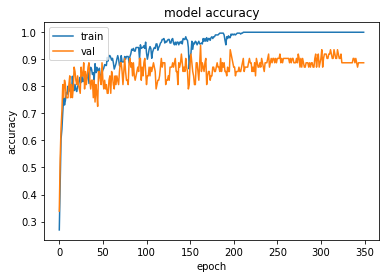

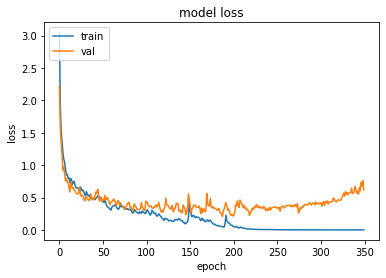

 Our result:- 
 [0 0 0 0 0 4 1 1 1 1 2 3 2 2 2 3 3 3 3 3 5 4 4 4 4 5 4 5 5 6 6 1 6 6 7 7 7
 7 7]
Real testY:- 
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7]
Accuracy:- 
 0.8717948717948718


In [ ]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=65,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.17)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=142,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  model=evaluateModel(layers,epochs=350)
  Result=model.predict(np.reshape(np.asarray(testSetX),newshape=(np.shape(testSetX)[0],nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

(301, 5, 4, 50, 50, 3)
(301, 8)
(62, 5, 4, 50, 50, 3)
(62, 8)
Epoch 1/350
31/31 - 29s - loss: 2.9393 - accuracy: 0.3189 - val_loss: 2.3343 - val_accuracy: 0.4032
Epoch 2/350
31/31 - 4s - loss: 2.1231 - accuracy: 0.4651 - val_loss: 1.8016 - val_accuracy: 0.5968
Epoch 3/350
31/31 - 4s - loss: 1.6609 - accuracy: 0.6478 - val_loss: 1.5200 - val_accuracy: 0.6452
Epoch 4/350
31/31 - 4s - loss: 1.3864 - accuracy: 0.7010 - val_loss: 1.1998 - val_accuracy: 0.7581
Epoch 5/350
31/31 - 4s - loss: 1.2501 - accuracy: 0.6844 - val_loss: 1.2176 - val_accuracy: 0.6935
Epoch 6/350
31/31 - 4s - loss: 1.0802 - accuracy: 0.7342 - val_loss: 0.9495 - val_accuracy: 0.7742
Epoch 7/350
31/31 - 4s - loss: 0.9298 - accuracy: 0.7674 - val_loss: 0.8947 - val_accuracy: 0.7419
Epoch 8/350
31/31 - 4s - loss: 0.8669 - accuracy: 0.7741 - val_loss: 0.8187 - val_accuracy: 0.7419
Epoch 9/350
31/31 - 4s - loss: 0.8585 - accuracy: 0.7608 - val_loss: 0.7920 - val_accuracy: 0.7258
Epoch 10/350
31/31 - 4s - loss: 0.8409 - accur

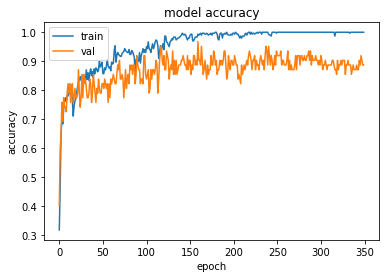

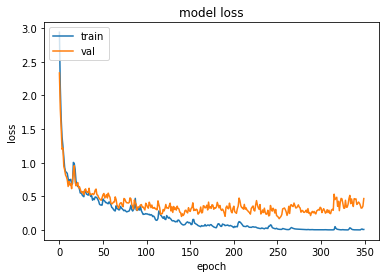

 Our result:- 
 [0 0 0 0 0 1 1 1 6 6 2 3 2 2 2 3 3 2 3 3 6 4 4 4 4 5 4 5 4 1 6 1 1 6 7 7 7
 7 7]
Real testY:- 
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7]
Accuracy:- 
 0.7435897435897436


In [ ]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=66,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.17)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=142,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  model=evaluateModel(layers,epochs=350)
  Result=model.predict(np.reshape(np.asarray(testSetX),newshape=(np.shape(testSetX)[0],nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))